In [1]:
import pandas as pd
import numpy as np

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

In [ ]:
files_ids = ['1lEpoRKczv5EvZhff9O2I-0JkdHnbe_Mq', '1EP3KrATWS1I_qYdpRhYnSDl-eoBiOBQc', '1FG1fopcmvMZ7GBaBOqQipccSeFoMUvNT', '10J8RzMIhoYHiad49r-oWNMAk-V5lo3OE']
for file_id in files_ids:
  !gdown $file_id

In [10]:
tr_mcc_codes = pd.read_csv("tr_mcc_codes.csv", sep = ";", index_col ="mcc_code")
tr_types = pd.read_csv("tr_types.csv", sep = ";", index_col ="tr_type")
transactions = pd.read_csv("transactions.csv")
gender_train = pd.read_csv("gender_train.csv")

In [11]:
# ограничиваем transactions по условиям лабы
transactions = transactions.head(1000000)

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;


Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


In [12]:
# создаем случайную выборку
tr_types_sample = transactions['tr_type'].sample(n=1000)

# проверяем, что у нас есть описание для выбранных данных в другом df и описание соотвествует требованиям
tr_types_valid_sample_count = tr_types.loc[tr_types_sample]['tr_description'].str.contains('POS|АТМ').sum()

tr_types_valid_sample_count / len(tr_types_sample)

0.638

## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [13]:
# считаем частоту через нормализованный value_counts, приводим результат к df, меняем нвазвание колонки и индекса
tr_types_freq = transactions["tr_type"].value_counts(normalize=True).to_frame().rename(columns={"tr_type": "tr_frequency"}).rename_axis("tr_type")
# округляем значения
tr_types_freq["tr_frequency"] = tr_types_freq["tr_frequency"].apply(lambda x: round(x, 3))

tr_types_freq

,tr_frequency
tr_type,
1010,0.231
2010,0.151
7070,0.149
1110,0.138
1030,0.119
...,...
2446,0.000
4096,0.000
8146,0.000


In [15]:
# берем только те значения, для которых есть описание
tr_types_freq = tr_types_freq[tr_types_freq.index.isin(tr_types.index)]
# добавляем описание 
tr_types_freq["tr_description"] = tr_types.loc[tr_types_freq.index, "tr_description"]
# сортируем и создаем отдельный df, он понадобится далее
tr_types_freq_top_10 = tr_types_freq.sort_values(by=['tr_frequency'], ascending=False).head(10)

tr_types_freq_top_10

,tr_frequency,tr_description
tr_type,,
1010,0.231,Покупка. POS ТУ СБ РФ
2010,0.151,Выдача наличных в АТМ Сбербанк России
7070,0.149,Перевод на карту (с карты) через Мобильный бан...
1110,0.138,Покупка. POS ТУ Россия
1030,0.119,Оплата услуги. Банкоматы СБ РФ
2370,0.050,Списание с карты на карту по операции <перевод...
7010,0.029,Взнос наличных через АТМ (в своем тер.банке)
7030,0.026,Перевод на карту (с карты) через АТМ (в предел...
7071,0.016,Перевод на карту (с карты) через Мобильный бан...


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [16]:
# две функции, которые помогают в агрегации значений

def income(s):
  result = round(sum([(i) for i in s if i > 0]))
  return result

def outcome(s):
  result = round(sum([(i) for i in s if i < 0])) * -1
  return result

In [17]:
customers = transactions.groupby("customer_id").agg({"amount":[income, outcome]})

customers.columns = customers.columns.droplevel()

In [18]:
max_customer = customers.sort_values(by=["income"], ascending=False).head(1)
max_customer[["income"]]

,income
customer_id,
70780820,1248114887


In [19]:
min_customer = customers.sort_values(by=["outcome"], ascending=False).head(1)
min_customer[["outcome"]]

,outcome
customer_id,
70780820,1249952205


In [20]:
# колонки с модулем разницы для 3.3
customers["diff"] = abs(customers["income"] - customers["outcome"])

# получаем индексы из задания 3.1 и 3.2, удаляем дубликаты (вдруг customer_id совпадает :) )
# также это пригодится в 4.2
valid_customers_id = list(set().union(*[list(min_customer.index.values), list(max_customer.index.values)]))

customers.loc[valid_customers_id, ["diff"]].drop_duplicates()

,diff
customer_id,
70780820,1837318


## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [21]:
transactions.loc[transactions["tr_type"].isin(tr_types_freq_top_10.index)].groupby("tr_type").agg({"amount":["mean", "median"]})

amount           
                  mean     median
tr_type                          
1010     -19784.748640   -7411.52
1030      -5320.980222   -2245.92
1100     -44061.827262  -10188.26
1110     -32119.330371  -11207.57
2010    -136077.629325  -44918.32
2370    -205418.249032  -44918.32
7010     276391.789596  112295.79
7030      86104.332909   13951.52
7070      65569.831700   11319.42
7071      66806.826623    3593.47

In [22]:
transactions.loc[transactions["customer_id"].isin(valid_customers_id)].groupby(["customer_id", "tr_type"]).agg({"amount":["mean", "median"]}).round(2)

amount            
                           mean      median
customer_id tr_type                        
70780820    2010    -2941055.87 -3368873.66
            2330    -2382398.34 -2245915.77
            2370    -2218504.99 -2245915.77
            6110       17562.93    10028.01
            7020       14651.29    10319.98
            7021       28500.67    28500.67
            7030       14061.96     8848.91
            7031       19210.36    12992.62
            7034       14306.48    14306.48
            7040       21538.33    14396.32
            7070       13848.21     8714.15
            7071       18600.57    12543.44
            7074       22811.59     9387.93

## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [23]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, right_index=True, left_on="mcc_code")
transactions = pd.merge(transactions, tr_types, right_index=True, left_on="tr_type")
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [24]:
# две агрегирующие функции, чтобы посчитать нужные значения по опр условиям входных данных
def income_mean(s):
  result = round(np.mean([(i) for i in s if i > 0]))
  return result

def outcome_mean(s):
  result = round(np.mean([(i) for i in s if i < 0]))
  return result

genders = transactions.groupby("gender").agg({"amount":[income_mean, outcome_mean]})

genders.columns = genders.columns.droplevel()
# заменять 0 и 1 на female и male необязательно, но так чуть удобнее
# никто, кстати, не говорил, что это именно так, но обычно имеено так (а еще у нас модуль)
genders = genders.rename(index={0: "Female", 1: "Male"})

In [25]:
result = abs(genders.at["Female", "outcome_mean"] - genders.at["Male", "outcome_mean"])

f"Модуль разницы между средними тратами: {result}"

'Модуль разницы между средними тратами: 32718'

In [26]:
result = abs(genders.at["Female", "income_mean"] - genders.at["Male", "income_mean"])

f"Модуль разницы между средними поступлениями: {result}"

'Модуль разницы между средними поступлениями: 63367'

## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [27]:
gender_max_income_by_tr_type = transactions.loc[transactions["amount"] > 0].groupby(["gender", "tr_type"]).agg({"amount": "max"}).rename(columns={"amount": "max_income"})

gender_max_income_by_tr_type_10 = gender_max_income_by_tr_type.groupby(level=0, group_keys=False)["max_income"].nsmallest(10).to_frame()

gender_max_income_by_tr_type_10

max_income
gender tr_type            
0.0    4051        1122.96
       4110        2245.92
       4210        2245.92
       2370        2335.75
       4100        5041.86
       7075        6737.75
       2110       22459.16
       1010       24839.83
       2010       44918.32
       2210       68315.82
1.0    2020        2245.92
       4110        2245.92
       1010       28803.87
       8100       64682.37
       6000       79280.83
       7041       87590.72
       2010       89836.63
       2110      112295.79
       2370      113194.15
       7015      121279.45

In [28]:
seen = set()
dupes = [ix for ix in gender_max_income_by_tr_type_10.index.get_level_values(1) if ix in seen or seen.add(ix)]    
print("Типы транзакций, которые встречаются одновременно и у мужчин, и у женщин: ")
print(*dupes, sep = ", ")

Типы транзакций, которые встречаются одновременно и у мужчин, и у женщин: 
4110, 1010, 2010, 2110, 2370


## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [29]:
gender_0 = transactions.loc[(transactions["gender"] == 0.0)].groupby(["mcc_code"]).agg({"amount": outcome}).rename(columns={"amount": "Female outcome"})
gender_1 = transactions.loc[(transactions["gender"] == 1.0)].groupby(["mcc_code"]).agg({"amount": outcome}).rename(columns={"amount": "Male outcome"})

genders_mcc_outcome = pd.merge(gender_0, gender_1, right_index=True, left_index=True)
genders_mcc_outcome

,Female outcome,Male outcome
mcc_code,,
742,386208,132278
1711,674898,206265
1799,261627,1129258
2741,20746,221290
3000,74431645,97954226
...,...,...
8699,521107,444183
8999,19432058,28643347
9222,361143,988205


In [30]:
genders_mcc_outcome["mcc_description"] = tr_mcc_codes.loc[tr_mcc_codes.index.isin(genders_mcc_outcome.index), ["mcc_description"]]
genders_mcc_outcome["diff"] = abs(genders_mcc_outcome["Female outcome"] - genders_mcc_outcome["Male outcome"])
genders_mcc_outcome.nlargest(10, ["diff"])[["diff", "mcc_description"]]

,diff,mcc_description
mcc_code,,
6011,3085861561,Финансовые институты — снятие наличности автом...
4829,2499153380,Денежные переводы
6010,220857974,Финансовые институты — снятие наличности вручную
5541,155432554,Станции техобслуживания
5511,73528767,"Легковой и грузовой транспорт — продажа, серви..."
5812,70378560,"Места общественного питания, рестораны"
5977,42417620,Магазины косметики
5533,42338078,Автозапчасти и аксессуары
7995,40795642,Транзакции по азартным играм


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

In [31]:
transactions["tr_hour"] = transactions["tr_datetime"].apply(lambda x: pd.to_datetime(str(x).split(" ")[-1], format='%H:%M:%S').hour)
transactions["tr_hour"].head(5).to_frame()

,tr_hour
0,10
9,7
14,7
17,8
20,14


In [32]:
transactions.loc[(transactions["amount"] < 0) & (transactions["tr_hour"].between(0, 6, inclusive="left")), :].groupby("gender").agg({"amount": "count"})

,amount
gender,
0.0,38827
1.0,43017


# Задание на защиту
Оставьте в датафрейме только тех клиентов,  которые совершили более 100 транзакций. Оставьте в датафрейме только транзакции по категориям из задания 7.2. Постройте для каждого пола диаграмму, на которой показано распределение их трат по этим категориям.  

In [83]:
import matplotlib.pyplot as plt

In [84]:
customers_operations = transactions.groupby("customer_id").agg({"amount": "count"})
valid_customer_ids = customers_operations.loc[customers_operations["amount"] > 100]
valid_customer_ids.head(3)

,amount
customer_id,
117556,774
186730,223
189257,426


In [85]:
nt = transactions.loc[(transactions["customer_id"].isin(valid_customer_ids.index))]
nt

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,10
9,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,7
14,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,7
17,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8
20,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,14
...,...,...,...,...,...,...,...,...,...,...
699020,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,23
771045,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,19
793069,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,22
822501,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,23


In [86]:
nt = nt.loc[(nt["mcc_code"].isin(genders_mcc_outcome.nlargest(10, ["diff"]).index))]
nt

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_hour
612708,20297899,130 00:00:00,4829,1100,-22459.16,NaN,NaN,Денежные переводы,Покупка. ТУ Россия,0
892995,34124149,206 00:00:00,4829,1100,-229.08,NaN,NaN,Денежные переводы,Покупка. ТУ Россия,0
892999,34124149,212 00:00:00,4829,1100,-916.33,24810017,NaN,Денежные переводы,Покупка. ТУ Россия,0
893005,34124149,218 00:00:00,4829,1100,-114.54,24810017,NaN,Денежные переводы,Покупка. ТУ Россия,0
893011,34124149,221 00:00:00,4829,1100,-916.33,24810017,NaN,Денежные переводы,Покупка. ТУ Россия,0
...,...,...,...,...,...,...,...,...,...,...
613008,20297899,391 00:00:00,7995,6210,112295.79,00000000,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ,0
613011,20297899,393 00:00:00,7995,6210,11229.58,00000000,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ,0
613019,20297899,395 00:00:00,7995,6210,101066.21,00000000,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ,0
648742,5577042,228 00:00:00,7995,6210,8759.07,00000000,NaN,Транзакции по азартным играм,Возврат покупки.POS Зарубеж. ТУ,0


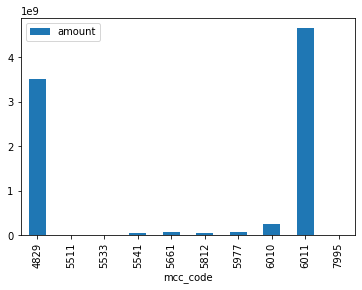

In [87]:
females = nt.loc[nt["gender"] == 0.0].groupby(["mcc_code"]).agg({"amount": outcome})
females.plot(use_index=True, y='amount', kind = 'bar')
plt.show()

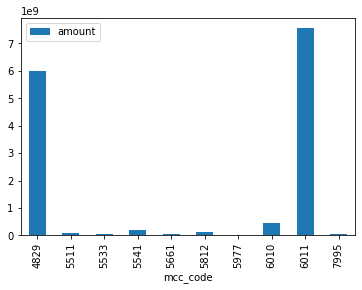

In [88]:
males = nt.loc[nt["gender"] == 1.0].groupby(["mcc_code"]).agg({"amount": outcome})
males.plot(use_index=True, y='amount', kind = 'bar')
plt.show()